In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
uk_data = pd.read_csv('../data/2023/uk.csv')
english_data = pd.read_csv('../data/2023/english.csv')
not_english_data = pd.read_csv('../data/2023/not_english.csv')

C:\Users\pm_\AppData\Local\Temp\ipykernel_17620\2486596948.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  english_data = pd.read_csv('../data/2023/english.csv')
C:\Users\pm_\AppData\Local\Temp\ipykernel_17620\2486596948.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  not_english_data = pd.read_csv('../data/2023/not_english.csv')


In [3]:
not_english_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78111 entries, 0 to 78110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UKPRN           78111 non-null  object 
 1   Provider name   78111 non-null  object 
 2   Level of study  78111 non-null  object 
 3   Subject code    78111 non-null  object 
 4   Subject         78111 non-null  object 
 5   Question        78111 non-null  object 
 6   Responses       78111 non-null  float64
 7   Population      78111 non-null  float64
 8   Option 1        78111 non-null  float64
 9   Option 2        78111 non-null  float64
 10  Option 3        78111 non-null  float64
 11  Option 4        78111 non-null  float64
 12  Option 5        2893 non-null   float64
 13  Positivity      78111 non-null  float64
 14  Response Rate   78111 non-null  float64
 15  Question Num    78111 non-null  object 
 16  index1          78111 non-null  int64  
dtypes: float64(9), int64(1), object

In [4]:
not_english_data[not_english_data['Question Num'] == 'Q28'].head(2)

,UKPRN,Provider name,Level of study,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num,index1
26,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),"Overall, I am satisfied with the quality of t...",233.0,285.0,66.0,119.0,21.0,18.0,9.0,79.4,83.2,Q28,25962
53,NI,Northern Ireland,All undergraduates,CAH01-01-04,Dentistry,"Overall, I am satisfied with the quality of t...",53.0,56.0,37.0,14.0,2.0,0.0,0.0,96.2,94.6,Q28,25989


In [5]:
not_english_data.describe()

,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,index1
count,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000,2893.000000,78111.000000,78111.000000,78111.000000
mean,62.804976,87.845282,20.165060,29.617674,10.057938,2.881660,2.199758,80.218457,75.111199,228019.812997
std,103.710336,148.600095,34.026691,50.202471,19.569777,6.983716,5.058553,13.619577,10.334023,132474.982776
min,0.900000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,25936.000000
25%,16.000000,22.000000,4.820000,7.000000,1.950000,0.000000,0.000000,73.100000,68.200000,45567.500000
50%,30.100000,42.000000,10.000000,14.000000,4.000000,1.000000,1.000000,82.400000,75.000000,292547.000000
75%,66.000000,92.000000,21.680000,31.500000,10.500000,3.000000,2.000000,90.000000,82.400000,337341.500000
max,1622.000000,2173.000000,713.000000,1022.000000,583.000000,249.000000,75.500000,100.000000,100.000000,384191.000000


In [6]:
english_data.describe()

,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,index1
count,294732.000000,294732.000000,294732.000000,294732.000000,294732.000000,294732.000000,0.0,294732.000000,294732.000000,294732.000000
mean,101.525687,143.726328,33.049193,48.129689,15.927249,4.416787,NaN,80.481600,75.873507,193331.026841
std,521.800906,759.200124,173.624623,249.964346,87.474399,26.614948,NaN,13.555456,10.629344,100301.464664
min,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,50.000000,12949.000000
25%,15.000000,20.000000,4.500000,6.990000,1.500000,0.000000,NaN,73.300000,68.600000,108441.750000
50%,29.500000,40.000000,9.000000,14.000000,4.000000,1.000000,NaN,82.700000,75.600000,189620.500000
75%,66.000000,91.700000,21.000000,32.000000,10.300000,3.000000,NaN,90.100000,83.300000,271502.250000
max,13919.600000,21553.200000,6598.850000,8960.950000,4481.550000,1522.890000,NaN,100.000000,100.000000,388781.000000


In [7]:
english_data = english_data[(english_data['Response Rate'] > 60) & (english_data['Population'] > 20)]

In [8]:
english_data = english_data[~((english_data['Provider name'] == 'City of Sunderland College') & (english_data['Subject code'] == 'CAH02-06-07'))]
english_data = english_data[~((english_data['Provider name'] == 'Edge Hill University') & (english_data['Subject code'] == 'CAH02-04-08'))]

In [9]:
english_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201366 entries, 0 to 294731
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UKPRN           201366 non-null  object 
 1   Provider name   201366 non-null  object 
 2   Level of study  201366 non-null  object 
 3   Subject code    201366 non-null  object 
 4   Subject         201366 non-null  object 
 5   Question        201366 non-null  object 
 6   Responses       201366 non-null  float64
 7   Population      201366 non-null  float64
 8   Option 1        201366 non-null  float64
 9   Option 2        201366 non-null  float64
 10  Option 3        201366 non-null  float64
 11  Option 4        201366 non-null  float64
 12  Option 5        0 non-null       float64
 13  Positivity      201366 non-null  float64
 14  Response Rate   201366 non-null  float64
 15  Question Num    201366 non-null  object 
 16  index1          201366 non-null  int64  
dtypes: float64(9), 

In [12]:
sample = not_english_data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
sample.head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num
0,236.0,59.0,153.0,18.0,6.0,NaN,89.8,Q01
1,236.0,49.0,148.0,34.0,5.0,NaN,83.5,Q02
2,236.0,152.0,77.0,6.0,1.0,NaN,97.0,Q03
3,236.0,109.0,100.0,25.0,2.0,NaN,88.6,Q04
4,234.0,92.0,108.0,29.0,5.0,NaN,85.5,Q05


In [13]:
sample['Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
sample['Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
sample['Opt-3'] = round((sample['Option 3'] / sample['Responses']) * 100, 1)
sample['Opt-4'] = round((sample['Option 4'] / sample['Responses']) * 100, 1)
sample.head()

C:\Users\pm_\AppData\Local\Temp\ipykernel_17620\3680040091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_17620\3680040091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
C:\Users\pm_\AppData\Local\Temp\ipykernel_17620\3680040091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
0,236.0,59.0,153.0,18.0,6.0,NaN,89.8,Q01,25.0,64.8,7.6,2.5
1,236.0,49.0,148.0,34.0,5.0,NaN,83.5,Q02,20.8,62.7,14.4,2.1
2,236.0,152.0,77.0,6.0,1.0,NaN,97.0,Q03,64.4,32.6,2.5,0.4
3,236.0,109.0,100.0,25.0,2.0,NaN,88.6,Q04,46.2,42.4,10.6,0.8
4,234.0,92.0,108.0,29.0,5.0,NaN,85.5,Q05,39.3,46.2,12.4,2.1


In [14]:
sample[sample['Question Num'] == 'Q28'].head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
26,233.0,66.0,119.0,21.0,18.0,9.0,79.4,Q28,28.3,51.1,9.0,7.7
53,53.0,37.0,14.0,2.0,0.0,0.0,96.2,Q28,69.8,26.4,3.8,0.0
80,91.0,43.0,28.0,9.0,10.0,1.0,78.0,Q28,47.3,30.8,9.9,11.0
107,499.0,201.0,218.0,62.0,14.0,4.0,84.0,Q28,40.3,43.7,12.4,2.8
134,58.0,15.0,33.0,4.0,4.0,2.0,82.8,Q28,25.9,56.9,6.9,6.9


In [15]:
only_options = sample[['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Positivity']]
only_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78111 entries, 0 to 78110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opt-1       78111 non-null  float64
 1   Opt-2       78111 non-null  float64
 2   Opt-3       78111 non-null  float64
 3   Opt-4       78111 non-null  float64
 4   Positivity  78111 non-null  float64
dtypes: float64(5)
memory usage: 3.0 MB


In [16]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 100))
# only_options['Opt1_Norm'] = scaler.fit_transform(only_options['Option 1'].values[:, None])
# only_options['Opt2_Norm'] = scaler.fit_transform(only_options['Option 2'].values[:, None])
# only_options['Opt3_Norm'] = scaler.fit_transform(only_options['Option 3'].values[:, None])
# only_options['Opt4_Norm'] = scaler.fit_transform(only_options['Option 4'].values[:, None])
# # only_options['Pos_Norm'] = scaler.fit_transform(only_options['Positivity'].values[:, None])
# only_options.drop(columns=['Option 1','Option 2','Option 3','Option 4'], inplace=True)
only_options.head()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
0,25.0,64.8,7.6,2.5,89.8
1,20.8,62.7,14.4,2.1,83.5
2,64.4,32.6,2.5,0.4,97.0
3,46.2,42.4,10.6,0.8,88.6
4,39.3,46.2,12.4,2.1,85.5


In [17]:
only_options.describe()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
count,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000
mean,33.653173,46.560266,15.321929,4.334514,80.218457
std,16.058440,12.312469,10.236765,5.725715,13.619577
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.100000,39.000000,8.100000,0.000000,73.100000
50%,32.100000,46.700000,14.000000,2.600000,82.400000
75%,43.500000,54.400000,20.800000,6.400000,90.000000
max,100.000000,100.400000,80.000000,84.600000,100.000000


In [18]:
only_options.head(2)

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
0,25.0,64.8,7.6,2.5,89.8
1,20.8,62.7,14.4,2.1,83.5


In [19]:
# only_options.rename(columns={'Opt-3':'Agree', 'Opt-4':'Strongly-Agree'}, inplace=True)

In [20]:
# only_options.drop(columns=['Positivity'], inplace=True)
# only_options['Positivity'] = sample['Positivity']
# only_options.head(2)

In [21]:
only_options.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78111 entries, 0 to 78110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opt-1       78111 non-null  float64
 1   Opt-2       78111 non-null  float64
 2   Opt-3       78111 non-null  float64
 3   Opt-4       78111 non-null  float64
 4   Positivity  78111 non-null  float64
dtypes: float64(5)
memory usage: 3.0 MB


In [22]:
num_rows = 27
num_sets = len(only_options) // num_rows  # Calculate the number of sets
reshaped_data = only_options.values.reshape(num_sets, num_rows, 5)

# Split into training and test sets
train_data = reshaped_data[:, :26, :4]  # First 26 rows of each set as training data
test_data = reshaped_data[:, 26, :4]    # 27th row of each set as test data

X = reshaped_data[:, :26, :4]
y = reshaped_data[:, 26, :4]

X = X.reshape(-1, 26 * 4)
y = y.reshape(-1, 4) 

In [23]:
# reshaped_data = only_options.values.reshape((2893, 27, 5))
# X = reshaped_data[:, :26, :4].reshape(2893, 26*4)
# y = reshaped_data[:, 26, 4]

In [24]:
print(X.shape)
print(y.shape)

(2893, 104)
(2893, 4)


In [25]:
y[0]

array([28.3, 51.1,  9. ,  7.7])

In [26]:
sample[sample['Opt-1']==28.3].head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
26,233.0,66.00,119.00,21.00,18.00,9.0,79.4,Q28,28.3,51.1,9.0,7.7
984,50.7,14.34,26.02,8.02,2.34,NaN,79.6,Q13,28.3,51.3,15.8,4.6
2053,23.0,6.50,11.50,3.50,1.50,NaN,78.3,Q02,28.3,50.0,15.2,6.5
2070,23.0,6.50,10.00,2.50,4.00,NaN,71.7,Q19,28.3,43.5,10.9,17.4
2645,187.0,53.00,96.00,19.00,14.00,5.0,79.7,Q28,28.3,51.3,10.2,7.5


In [27]:
len(X[0])

104

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

model_new = Sequential()

# Increased number of neurons in the input layer and added L2 regularization
model_new.add(Dense(256, input_dim=104, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(BatchNormalization())  # Normalizing the input layer output
model_new.add(Dropout(0.3))  # Increased dropout to prevent overfitting

# Additional hidden layers with reduced neurons to form a funnel-shaped architecture
model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(BatchNormalization())  # Normalizing the previous layer's output
model_new.add(Dropout(0.3))  # Increased dropout

model_new.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer
model_new.add(Dense(4, activation='linear'))

# Compile the model
model_new.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss_new = model_new.evaluate(X_test, y_test)
print("Test Loss:", loss_new)

# # Make predictions
# predictions = model_new.predict(X_test)
# print(predictions)

c:\user_exe\00_Leeds\Dissertation\project-files\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 713.4454 - val_loss: 273.6277
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.9366 - val_loss: 105.6186
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.6637 - val_loss: 70.4007
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56.4948 - val_loss: 62.8414
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.9960 - val_loss: 51.8989
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 55.3413 - val_loss: 51.7401
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.2403 - val_loss: 89.9295
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.9096 - val_loss: 44.0243
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.2062 - val_loss: 42.6796
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.5578 - val_loss: 69.8832
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.0580 - val_loss: 40.4901
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━

In [30]:
y_test[0]

array([78.3, 21.7,  0. ,  0. ])

In [31]:
sample[(sample['Opt-1']==y_test[0][0]) & (sample['Question Num']=='Q28')].head()

,Responses,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Question Num,Opt-1,Opt-2,Opt-3,Opt-4
28322,23.0,18.0,5.0,0.0,0.0,0.0,100.0,Q28,78.3,21.7,0.0,0.0
28673,23.0,18.0,5.0,0.0,0.0,0.0,100.0,Q28,78.3,21.7,0.0,0.0


In [32]:
sample_input = X_test[0].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[0])
print("Input Shape:", X_test[0].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Sample Input: [78.3 21.7  0.   0.  52.2 47.8  0.   0.  69.6 30.4  0.   0.  69.6 30.4
  0.   0.  60.9 26.1 13.   0.  69.6 30.4  0.   0.  60.9 34.8  4.3  0.
 69.6 26.1  4.3  0.  73.9 26.1  0.   0.  56.5 39.1  4.3  0.  56.5 43.5
  0.   0.  43.5 56.5  0.   0.  47.8 39.1 13.   0.  60.9 39.1  0.   0.
 65.2 34.8  0.   0.  69.6 30.4  0.   0.  65.2 34.8  0.   0.  59.1 40.9
  0.   0.  68.2 31.8  0.   0.  82.6 17.4  0.   0.  61.1 33.3  5.6  0.
 69.6 30.4  0.   0.  65.2 34.8  0.   0.  31.8 45.5 22.7  0.  31.6 52.6
 15.8  0.  73.9 26.1  0.   0. ]
Input Shape: (104,)
Predicted Output: [80.  19.   1.7  0.9]
Actual Output: [78.3 21.7  0.   0. ]


In [33]:
sample_input = X_test[10].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[10])
print("Input Shape:", X_test[10].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Sample Input: [16.7 66.7 16.7  0.  11.1 61.1 16.7 11.1 27.8 44.4 22.2  5.6 38.9 22.2
 38.9  0.  16.7 33.3 44.4  5.6 27.8 38.9 33.3  0.  11.1 27.8 50.  11.1
 22.2 27.8 38.9 11.1 22.2 27.8 38.9 11.1 22.2 33.3 44.4  0.  41.2 35.3
 17.6  5.9 27.8 33.3 33.3  5.6 11.1 44.4 27.8 16.7 11.1 44.4 33.3 11.1
 16.7 22.2 44.4 16.7 22.2 44.4 16.7 16.7  5.6 38.9 38.9 16.7 25.  31.2
 31.2 12.5 41.2 41.2 17.6  0.   7.1 64.3  7.1 21.4 35.3 41.2 17.6  5.9
 17.6 47.1 17.6 17.6 11.8 29.4 35.3 23.5  0.  23.5 47.1 29.4  0.  46.2
 30.8 23.1 22.2 38.9 16.7 22.2]
Input Shape: (104,)
Predicted Output: [10.3 30.9 13.9 23.1]
Actual Output: [11.1 33.3 16.7 22.2]


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 1/73 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Absolute Error (MAE) - Train: 3.3848300335569834
Mean Squared Error (MSE) - Train: 19.130197479366096
R² Score - Train: 0.784994948936676


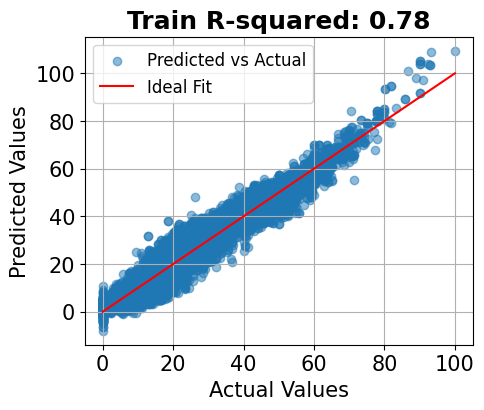

Mean Absolute Error (MAE) - Test: 4.119601330158522
Mean Squared Error (MSE) - Test: 30.37789179377595
R² Score - Test: 0.6898370226926154


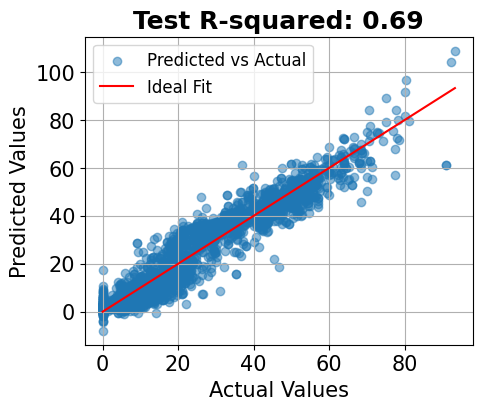

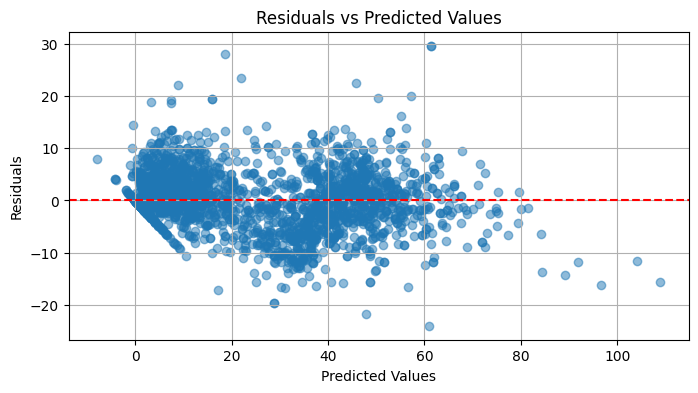

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

# Performance metrics for training data
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Print performance metrics for training data
print(f"Mean Absolute Error (MAE) - Train: {mae_train}")
print(f"Mean Squared Error (MSE) - Train: {mse_train}")
print(f"R² Score - Train: {r2_train}")

# Plot actual vs predicted values for training data
plt.figure(figsize=(5, 4))
plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Train R-squared: {round(r2_train, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Performance metrics for test data
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Print performance metrics for test data
print(f"Mean Absolute Error (MAE) - Test: {mae_test}")
print(f"Mean Squared Error (MSE) - Test: {mse_test}")
print(f"R² Score - Test: {r2_test}")

# Plot actual vs predicted values for test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Test R-squared: {round(r2_test, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

dict_keys(['loss', 'val_loss'])


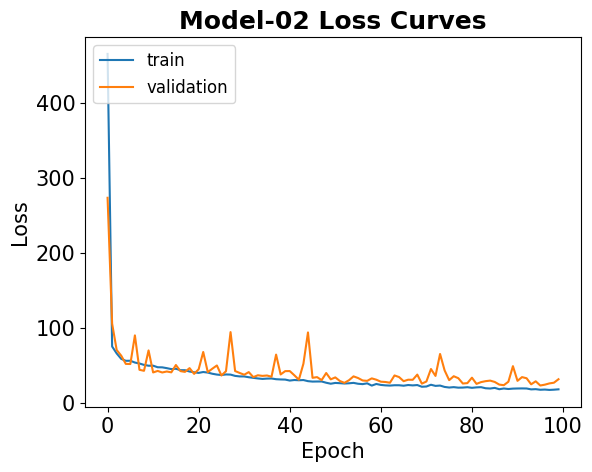

In [36]:
print(history_new.history.keys())
# summarize history for loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model-02 Loss Curves', fontsize=18, weight='bold')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

In [37]:
sample_input = X_test[19].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[19])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Output: [47.7 42.2  6.5  1.7]
Actual Output: [54.  36.7  8.4  0.4]


In [38]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
predictions_rounded = np.round(predictions, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
test_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Test_Pred_{i}' for i in range(predictions_rounded.shape[1])])
test_predictions_df['Test_Pred'] = sum_predicted
test_predictions_df = test_predictions_df.astype('float')
test_predictions_df = test_predictions_df.round(1)
test_predictions_df.head()

,Test_Pred_0,Test_Pred_1,Test_Pred_2,Test_Pred_3,Test_Pred
0,80.0,19.0,1.7,0.9,99.0
1,37.8,41.5,14.7,3.2,79.3
2,27.8,61.0,4.9,6.3,88.8
3,49.4,52.6,0.9,0.8,102.0
4,56.4,36.4,2.9,1.5,92.8


In [40]:
sum_predicted = np.sum(y_test[:, :2], axis=1)
test_actual_df = pd.DataFrame(y_test, columns=[f'Test_Actual_{i}' for i in range(y_test.shape[1])])
test_actual_df['Test_Actual'] = sum_predicted
test_actual_df.head()

,Test_Actual_0,Test_Actual_1,Test_Actual_2,Test_Actual_3,Test_Actual
0,78.3,21.7,0.0,0.0,100.0
1,46.2,34.6,15.4,3.8,80.8
2,21.3,56.0,12.0,9.3,77.3
3,50.8,48.6,0.0,0.0,99.4
4,54.3,37.8,5.5,1.6,92.1


In [41]:
predictions_rounded = np.round(predictions_train, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
train_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Train_Pred_{i}' for i in range(predictions_rounded.shape[1])])
train_predictions_df['Train_Pred'] = sum_predicted
train_predictions_df = train_predictions_df.astype('float')
train_predictions_df = train_predictions_df.round(1)
train_predictions_df.head()

,Train_Pred_0,Train_Pred_1,Train_Pred_2,Train_Pred_3,Train_Pred
0,38.4,47.9,8.7,4.0,86.3
1,35.7,64.5,1.7,0.5,100.2
2,58.5,35.2,3.2,-0.4,93.7
3,35.5,55.6,4.8,3.4,91.1
4,22.2,70.1,-3.3,2.7,92.3


In [42]:
sum_predicted = np.sum(y_train[:, :2], axis=1)
train_actual_df = pd.DataFrame(y_train, columns=[f'Train_Actual_{i}' for i in range(y_train.shape[1])])
train_actual_df['Train_Actual'] = sum_predicted
train_actual_df.head()

,Train_Actual_0,Train_Actual_1,Train_Actual_2,Train_Actual_3,Train_Actual
0,29.3,52.9,10.3,4.1,82.2
1,35.0,60.0,5.0,0.0,95.0
2,57.1,35.7,7.1,0.0,92.8
3,26.8,61.0,4.9,4.9,87.8
4,18.2,63.6,0.0,0.0,81.8


In [43]:
test_compare = pd.DataFrame()
test_compare['Pred'] = test_predictions_df['Test_Pred']
test_compare['Actual'] = test_actual_df['Test_Actual']
test_compare['Pred_0'] = test_predictions_df['Test_Pred_0']
test_compare['Actual_0'] = test_actual_df['Test_Actual_0']
test_compare['Pred_1'] = test_predictions_df['Test_Pred_1']
test_compare['Actual_1'] = test_actual_df['Test_Actual_1']
test_compare['Pos_Diff'] = test_compare['Pred'] - test_compare['Actual']
test_compare['0_Diff'] = test_compare['Pred_0'] - test_compare['Actual_0']
test_compare['1_Diff'] = test_compare['Pred_1'] - test_compare['Actual_1']

train_compare = pd.DataFrame()
train_compare['Pred'] = train_predictions_df['Train_Pred']
train_compare['Actual'] = train_actual_df['Train_Actual']
train_compare['Pred_0'] = train_predictions_df['Train_Pred_0']
train_compare['Actual_0'] = train_actual_df['Train_Actual_0']
train_compare['Pred_1'] = train_predictions_df['Train_Pred_1']
train_compare['Actual_1'] = train_actual_df['Train_Actual_1']
train_compare['Pos_Diff'] = train_compare['Pred'] - train_compare['Actual']
train_compare['0_Diff'] = train_compare['Pred_0'] - train_compare['Actual_0']
train_compare['1_Diff'] = train_compare['Pred_1'] - train_compare['Actual_1']

In [44]:
test_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,99.0,100.0,80.0,78.3,19.0,21.7,-1.0,1.7,-2.7
1,79.3,80.8,37.8,46.2,41.5,34.6,-1.5,-8.4,6.9
2,88.8,77.3,27.8,21.3,61.0,56.0,11.5,6.5,5.0
3,102.0,99.4,49.4,50.8,52.6,48.6,2.6,-1.4,4.0
4,92.8,92.1,56.4,54.3,36.4,37.8,0.7,2.1,-1.4


In [45]:
train_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,86.3,82.2,38.4,29.3,47.9,52.9,4.1,9.1,-5.0
1,100.2,95.0,35.7,35.0,64.5,60.0,5.2,0.7,4.5
2,93.7,92.8,58.5,57.1,35.2,35.7,0.9,1.4,-0.5
3,91.1,87.8,35.5,26.8,55.6,61.0,3.3,8.7,-5.4
4,92.3,81.8,22.2,18.2,70.1,63.6,10.5,4.0,6.5


In [46]:
test_compare.describe().iloc[1:]

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
mean,80.855959,78.294128,35.651813,32.015544,45.204145,46.278584,2.561831,3.636269,-1.074439
std,13.890158,13.482544,14.772190,16.118469,11.615102,12.152739,5.274704,5.871295,5.902097
min,18.500000,17.900000,3.000000,0.000000,2.100000,6.700000,-27.900000,-13.400000,-29.600000
25%,76.400000,71.500000,28.000000,20.600000,40.000000,39.750000,-0.300000,-0.250000,-4.200000
50%,83.400000,80.500000,35.700000,29.200000,46.300000,47.100000,2.400000,4.000000,-1.100000
75%,89.150000,87.100000,40.800000,41.650000,52.100000,53.300000,5.600000,7.700000,2.400000
max,114.700000,100.400000,108.900000,93.300000,81.500000,90.900000,18.500000,19.700000,24.000000


In [47]:
train_compare.describe().iloc[1:]

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
mean,80.923336,78.449827,35.895333,32.792567,45.028003,45.657260,2.473509,3.102766,-0.629257
std,13.891788,13.199254,14.439261,15.706432,11.882551,11.602908,4.412591,4.672856,4.141263
min,15.200000,16.000000,0.900000,0.000000,-0.600000,0.000000,-15.600000,-13.500000,-16.200000
25%,75.500000,71.500000,28.400000,21.700000,39.300000,40.000000,-0.300000,0.200000,-3.400000
50%,83.500000,80.000000,35.500000,30.600000,46.150000,46.350000,2.300000,3.100000,-0.900000
75%,89.400000,87.600000,41.100000,41.400000,51.800000,52.900000,5.300000,6.400000,2.000000
max,114.700000,100.800000,109.500000,100.000000,91.700000,90.000000,16.700000,19.500000,21.800000


In [48]:
test_compare.describe().iloc[1][6:]

Pos_Diff    2.561831
0_Diff      3.636269
1_Diff     -1.074439
Name: mean, dtype: float64

In [49]:
train_compare.describe().iloc[1][6:]

Pos_Diff    2.473509
0_Diff      3.102766
1_Diff     -0.629257
Name: mean, dtype: float64

In [50]:
# Test:
# Pos_Diff   -1.957686
# 0_Diff     -3.566149
# 1_Diff      1.608463


# Train:
# Pos_Diff   -1.957686
# 0_Diff     -3.566149
# 1_Diff      1.608463

In [51]:
# english_data.info()

In [52]:
# english_data.describe()

In [53]:
# len(english_data['Question Num'].unique())

In [54]:
# sample = english_data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Option 5', 'Positivity', 'Question Num']]
# sample.head()

In [55]:
# sample['Opt-1'] = round((sample['Option 1'] / sample['Responses']) * 100, 1)
# sample['Opt-2'] = round((sample['Option 2'] / sample['Responses']) * 100, 1)
# sample['Opt-3'] = round((sample['Option 3'] / sample['Responses']) * 100, 1)
# sample['Opt-4'] = round((sample['Option 4'] / sample['Responses']) * 100, 1)
# sample.head()

In [56]:
# sample.describe()

In [57]:
# only_pos.shape

In [58]:
# only_pos = sample[['Positivity']]
# # from sklearn.preprocessing import MinMaxScaler

# # scaler = MinMaxScaler(feature_range=(0, 100))
# # only_pos['Pos_Norm'] = scaler.fit_transform(only_pos['Positivity'].values[:, None])
# # only_pos.drop(columns=['Positivity'], inplace=True)
# # reshaped_data = only_pos.values.reshape((10916, 27))
# reshaped_data = only_pos.values.reshape((7458, 27))
# english_26 = reshaped_data[:, :26]

In [59]:
# predictions = model.predict(english_26)

In [60]:
# predictions

In [61]:
# english_26[0]

In [62]:
# predictions[0]

In [63]:
# only_options = english_data[['Responses', 'Option 1', 'Option 2', 'Option 3', 'Option 4', 'Positivity']]

In [64]:
# only_options['Opt-1'] = round((only_options['Option 1'] / only_options['Responses']) * 100, 1)
# only_options['Opt-2'] = round((only_options['Option 2'] / only_options['Responses']) * 100, 1)
# only_options['Opt-3'] = round((only_options['Option 3'] / only_options['Responses']) * 100, 1)
# only_options['Opt-4'] = round((only_options['Option 4'] / only_options['Responses']) * 100, 1)
# only_options.head()

In [65]:
# only_options = only_options[['Opt-1','Opt-2','Opt-3','Opt-4','Positivity']]
# only_options.head()

In [66]:
# only_options.info()

In [67]:
# # from sklearn.preprocessing import MinMaxScaler

# # scaler = MinMaxScaler(feature_range=(0, 100))
# # only_options['Opt1_Norm'] = scaler.fit_transform(only_options['Option 1'].values[:, None])
# # only_options['Opt2_Norm'] = scaler.fit_transform(only_options['Option 2'].values[:, None])
# # only_options['Opt3_Norm'] = scaler.fit_transform(only_options['Option 3'].values[:, None])
# # only_options['Opt4_Norm'] = scaler.fit_transform(only_options['Option 4'].values[:, None])
# # only_options['Pos_Norm'] = scaler.fit_transform(only_options['Positivity'].values[:, None])
# # only_options.drop(columns=['Option 1','Option 2','Option 3','Option 4','Positivity'], inplace=True)
# # reshaped_data = only_options.values.reshape((10916, 27, 5))
# # english_26_options = reshaped_data[:, :26, :4].reshape(10916, 26*4)
# reshaped_data = only_options.values.reshape((7458, 27, 5))
# english_26_options = reshaped_data[:, :26, :4].reshape(7458, 26*4)

In [68]:
# predictions_new = model_new.predict(english_26_options)

In [69]:
# english_26_options[0]

In [70]:
# predictions_new[0]

In [71]:
# english_data.shape

In [72]:
# len(predictions_new)

In [73]:
# unique = english_data[['Provider name', 'Level of study', 'Subject', 'Subject code']]
# unique['Subject'].value_counts()

In [74]:
# unique['Combined'] = unique['Provider name'] + '//' + unique['Level of study'] + '//' + unique['Subject'] + '//' + unique['Subject code']
# unique.head()

In [75]:
# len(unique['Combined'].unique())

In [76]:
# unique.drop(columns=['Provider name', 'Level of study', 'Subject', 'Subject code'], inplace=True)

In [77]:
# unique[unique['Combined'].str.contains('University of Leeds')]

In [78]:
# unique.head(10)

In [79]:
# len(unique['Combined'].unique()) 

In [80]:
# df = pd.DataFrame({'Combined':unique['Combined'].unique()})
# df.head()

In [81]:
# df.shape

In [82]:
# predictions_new[1][0]

In [83]:
# pred_r = []
# for i in range(len(predictions)):
#   pred_r.append(round(float(predictions[i][0]), 1))

# pred_rounded = []
# for i in range(len(predictions_new)):
#   pred_rounded.append(round(float(predictions_new[i][0]), 1))

In [84]:
# df['Predicted_28_Positivity'] = pred_r
# df['Predicted_28_Options'] = pred_rounded
# df.head()

In [85]:
# df.describe()

In [86]:
# df[(df['Combined'].str.contains('University of Leeds') & df['Combined'].str.contains('Comp'))]

In [87]:
# df[(df['Combined'].str.contains('University of Leeds') & df['Combined'].str.contains('Comp'))].values

In [88]:
# df[df['Predicted_28_Options'] > 100].shape

In [89]:
# df.head()

In [90]:
# df['Combined'][0].split('//')

In [91]:
# df[['Provider', 'Level', 'Subject', 'Code']] = df['Combined'].str.split('//', expand=True)
# df.head()

In [92]:
# copy = df.copy()
# df.drop(columns=['Combined', 'Predicted_28_Positivity', 'Predicted_28_Options'], inplace=True)
# df['Predicted_28_Positivity'] = copy['Predicted_28_Positivity']
# df['Predicted_28_Options'] = copy['Predicted_28_Options']
# df.head()

In [93]:
# df['Prediction_Diff'] = df['Predicted_28_Options'] - df['Predicted_28_Positivity']
# df.head()

In [94]:
# english_data[(english_data['Subject code'] == 'CAH02-06-07') & (english_data['Level of study'] == 'All undergraduates') & (english_data['Provider name'] == 'City of Sunderland College')]

In [95]:
# english_data['Population'].describe()

In [96]:
# # df[df['Predicted_28_Options'] > 100]
# df['Predicted_28_Options'].describe()

In [97]:
# df[df['Provider']=='University of Gloucestershire']['Code'].value_counts()

In [98]:
# df[df['Predicted_28_Options'] > 100]

In [99]:
# df.head()

In [100]:
# df.to_csv('../data/2023/english_predicted.csv', index=False)

In [101]:
# df.describe()